# 1. Import Pre-trained model

# 2. Import sample image 

# 3. Test Time Training

In [ ]:
--name [experiment_name] --dataset_mode custom --label_dir [path_to_labels] -- image_dir [path_to_images] --label_nc [num_labels]

> pre_trained 모델은 D가 없어서 못 씀

# 4. 테스트

In [2]:
import os
import matplotlib.pyplot as plt
from PIL import Image

In [284]:
img_name='000000001993'

In [55]:
original_img_path='TTTT/val_img'
result_label_path='results/coco_pretrained/test_latest/images/input_label'
result_img_path='results/coco_pretrained/test_latest/images/synthesized_image'


In [57]:
lab=plt.imread(os.path.join(result_label_path, img_name+'.png'))
gen_img=plt.imread(os.path.join(result_img_path, img_name+'.png'))
ori_img=plt.imread(os.path.join(original_img_path, img_name+'.jpg'))

In [58]:
ori_img=Image.fromarray(ori_img).resize(gen_img.shape[:2])

(-0.5, 255.5, 255.5, -0.5)

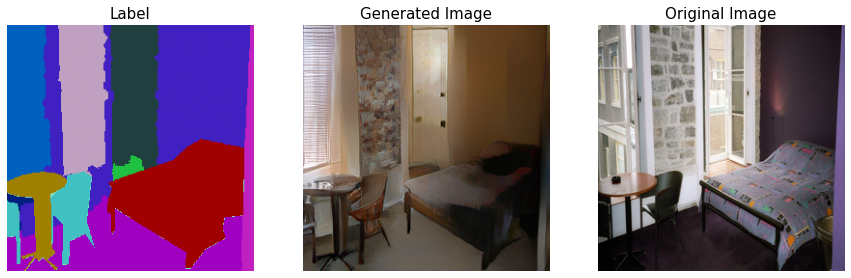

In [61]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(lab)
plt.title('Label', size=15)
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(gen_img)
plt.title('Generated Image', size=15)
plt.axis('off')
plt.subplot(1,3,3)
plt.title('Original Image', size=15)
plt.imshow(ori_img)
plt.axis('off')

In [77]:
import numpy as np


In [79]:
len(np.unique(lab))

8

## 4.1. Test for one-training

In [286]:
original_img_path='TTTT/val_img'
result_label_path='results/TTTT/train_latest/images/input_label'
result_img_path='results/TTTT/train_latest/images/synthesized_image'


img_name='000000001993'

lab=plt.imread(os.path.join(result_label_path, img_name+'.png'))
gen_img=plt.imread(os.path.join(result_img_path, img_name+'.png'))
ori_img=plt.imread(os.path.join(original_img_path, img_name+'.jpg'))
ori_img=Image.fromarray(ori_img).resize(gen_img.shape[:2])

### 50 에폭

(-0.5, 255.5, 255.5, -0.5)

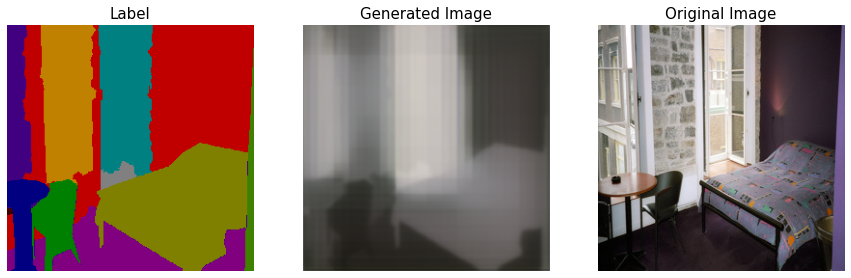

In [287]:

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(lab)
plt.title('Label', size=15)
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(gen_img)
plt.title('Generated Image', size=15)
plt.axis('off')
plt.subplot(1,3,3)
plt.title('Original Image', size=15)
plt.imshow(ori_img)
plt.axis('off')

### 1000에폭

In [3]:
import os
from PIL import Image
from IPython.display import Image as Img
from IPython.display import display

In [55]:
images_link='checkpoints/TTTT/web/images'

In [69]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation, PillowWriter

# parameters
n_frames = int(len(os.listdir(images_link))/3)
n_splots = 3
n_cols = 3
n_rows = n_splots // n_cols


def update_data(x):
    return x ** 2

# create all snapshots
snapshots=[]
for i in range(n_frames):
    snapshots.append([plt.imread(os.path.join(images_link, os.listdir(images_link)[0+3*i])),
plt.imread(os.path.join(images_link, os.listdir(images_link)[1+3*i])),
plt.imread(os.path.join(images_link, os.listdir(images_link)[2+3*i]))])

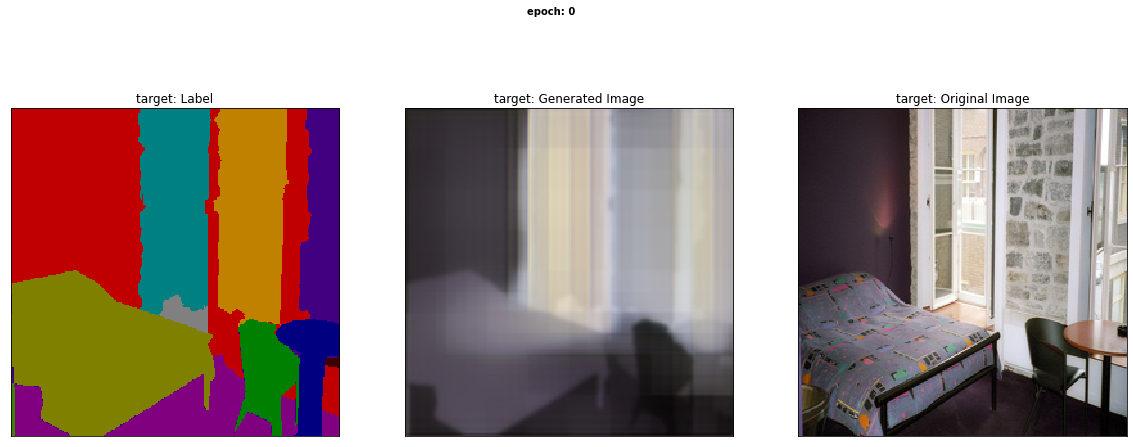

In [81]:
# initialize figure and static elements
fig, axes = plt.subplots(1, 3, figsize=(20,8))
axes = axes.ravel()  # so we can access all axes with a single index

labels=['Label', 'Generated Image', 'Original Image']
for i, ax in enumerate(axes):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("target: {}".format(labels[i]))

# initialize elements to be animated
step_txt = fig.text(0.5, 0.95, "step: 0", ha="center", weight="bold")

imgs = list()
for a, s in zip(axes, snapshots[0]):
    imgs.append(a.imshow(s, interpolation="none", cmap="gray"))


# animation function
def animate(i):

    # update images
    for img, s in zip(imgs, snapshots[i]):
        img.set_data(s)

    # update text
    step_txt.set_text("epoch: {}".format(i*100))

    # etc


anim = FuncAnimation(fig, animate, frames=n_frames, interval=5000, repeat_delay=100, repeat=True)
anim.save("test.gif", writer=PillowWriter())

### 4.3. New labels

(-0.5, 255.5, 255.5, -0.5)

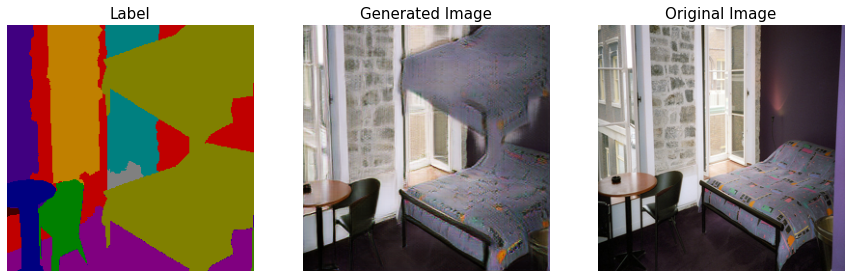

In [103]:
original_img_path='TTTT/val_img'
result_label_path='results/TTTT/train_latest/images/input_label'
result_img_path='results/TTTT/train_latest/images/synthesized_image'


img_name='100000001993'

lab=plt.imread(os.path.join(result_label_path, img_name+'.png'))
gen_img=plt.imread(os.path.join(result_img_path, img_name+'.png'))
ori_img=plt.imread(os.path.join(original_img_path, img_name+'.jpg'))
ori_img=Image.fromarray(ori_img).resize(gen_img.shape[:2])
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(lab)
plt.title('Label', size=15)
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(gen_img)
plt.title('Generated Image', size=15)
plt.axis('off')
plt.subplot(1,3,3)
plt.title('Original Image', size=15)
plt.imshow(ori_img)
plt.axis('off')

### 4.3. 기타

In [ ]:
plt.subplots

In [ ]:
def generate_gif(path):
    img_list = os.listdir(path)
    img_list = [path + '/' + x for x in img_list]
    images = [Image.open(x) for x in img_list]
    
    im = images[0]
    im.save('out.gif', save_all=True, append_images=images[1:],loop=0xff, duration=500)
    # loop 반복 횟수
    # duration 프레임 전환 속도 (500 = 0.5초)
    return Img(url='out.gif')

In [36]:
images_link='checkpoints/TTTT/web/images'

In [37]:
images=[]
for idx,image_path in enumerate(os.listdir(images_link)):
    if idx%3==0:
        label=plt.imread(os.path.join(images_link, image_path))
    elif idx%3==1:
        syn=plt.imread(os.path.join(images_link, image_path))
    else:
        real=plt.imread(os.path.join(images_link, image_path))
    
    
    if (idx%3==0)&(idx!=0):
        images.append([label, syn, real])
        
        
    
    

In [83]:
os.listdir(images_link)

['epoch100_iter100_input_label.png',
 'epoch100_iter100_synthesized_image.png',
 'epoch100_iter100_real_image.png',
 'epoch200_iter200_input_label.png',
 'epoch200_iter200_synthesized_image.png',
 'epoch200_iter200_real_image.png',
 'epoch300_iter300_input_label.png',
 'epoch300_iter300_synthesized_image.png',
 'epoch300_iter300_real_image.png',
 'epoch400_iter400_input_label.png',
 'epoch400_iter400_synthesized_image.png',
 'epoch400_iter400_real_image.png',
 'epoch500_iter500_input_label.png',
 'epoch500_iter500_synthesized_image.png',
 'epoch500_iter500_real_image.png',
 'epoch600_iter600_input_label.png',
 'epoch600_iter600_synthesized_image.png',
 'epoch600_iter600_real_image.png',
 'epoch700_iter700_input_label.png',
 'epoch700_iter700_synthesized_image.png',
 'epoch700_iter700_real_image.png',
 'epoch800_iter800_input_label.png',
 'epoch800_iter800_synthesized_image.png',
 'epoch800_iter800_real_image.png',
 'epoch900_iter900_input_label.png',
 'epoch900_iter900_synthesized_imag

In [100]:
lab=plt.imread(os.path.join(images_link, 'epoch6000_iter6000_input_label.png'))
gen_img=plt.imread(os.path.join(images_link,'epoch6000_iter6000_synthesized_image.png'))
ori_img=plt.imread(os.path.join(images_link,'epoch6000_iter6000_real_image.png'))

(-0.5, 255.5, 255.5, -0.5)

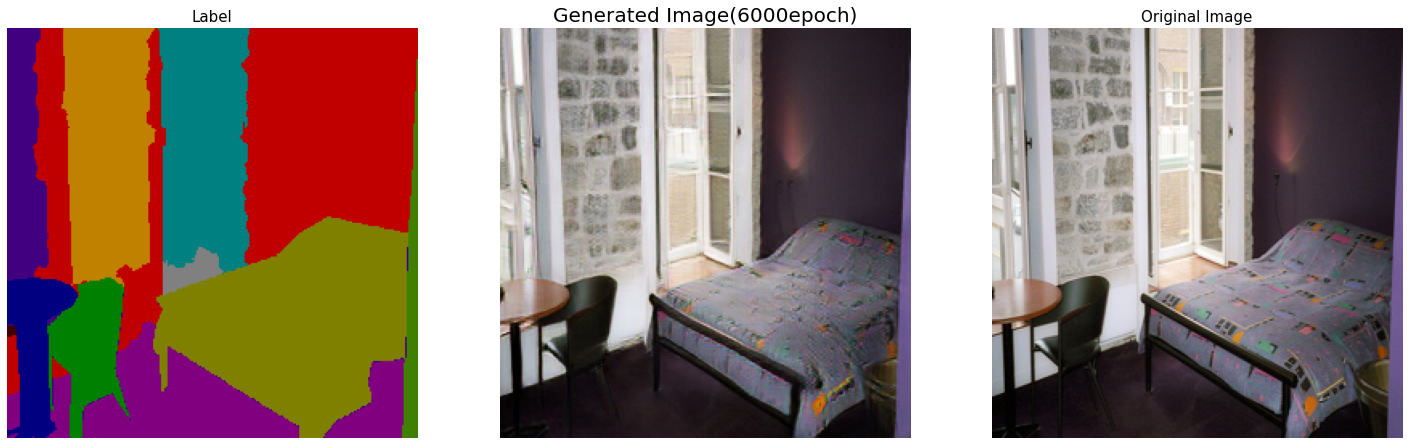

In [101]:

plt.figure(figsize=(25,15))
plt.subplot(1,3,1)
plt.imshow(lab)
plt.title('Label', size=15)
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(gen_img)
plt.title(f'Generated Image(6000epoch)', size=20)
plt.axis('off')
plt.subplot(1,3,3)
plt.title('Original Image', size=15)
plt.imshow(ori_img)
plt.axis('off')


# 4.1. Flickr

In [64]:
import os

In [3]:
original_img_path='TTTT/test_img'
result_label_path='results/Flickr/train_latest/images/input_label'
result_img_path='results/Flickr/train_latest/images/synthesized_image'


(-0.5, 511.5, 511.5, -0.5)

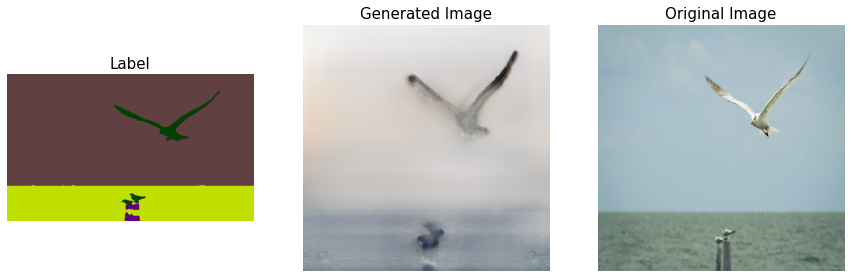

In [65]:


img_name='000000203744'

lab=plt.imread(os.path.join(result_label_path, img_name+'.png'))
gen_img=plt.imread(os.path.join(result_img_path, img_name+'.png'))
ori_img=plt.imread(os.path.join(original_img_path, img_name+'.jpg'))
ori_img=Image.fromarray(ori_img).resize(gen_img.shape[:2])
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(lab)
plt.title('Label', size=15)
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(gen_img)
plt.title('Generated Image', size=15)
plt.axis('off')
plt.subplot(1,3,3)
plt.title('Original Image', size=15)
plt.imshow(ori_img)
plt.axis('off')

In [4]:
original_img_path='gm_TTTT/test_img'
result_label_path='results/Flickr/train_50/images/input_label'
result_img_path='results/Flickr/train_50/images/synthesized_image'


In [34]:
lab=plt.imread(os.path.join(result_label_path, '001'+'.png'))
gen_img=plt.imread(os.path.join(result_img_path, '001'+'.png'))
ori_img=plt.imread(os.path.join(original_img_path, '001_06'+'.jpg'))

(-0.5, 507.5, 338.5, -0.5)

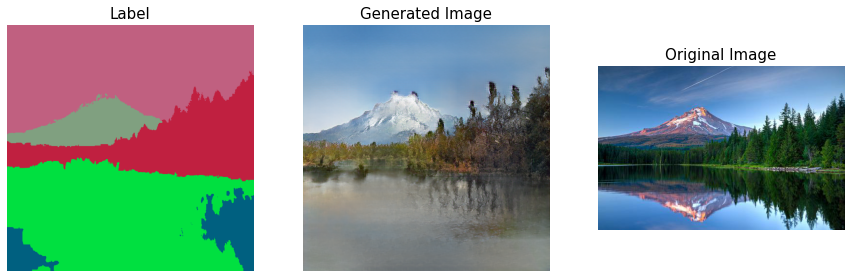

In [36]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(lab)
plt.title('Label', size=15)
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(gen_img)
plt.title('Generated Image', size=15)
plt.axis('off')
plt.subplot(1,3,3)
plt.title('Original Image', size=15)
plt.imshow(ori_img)
plt.axis('off')

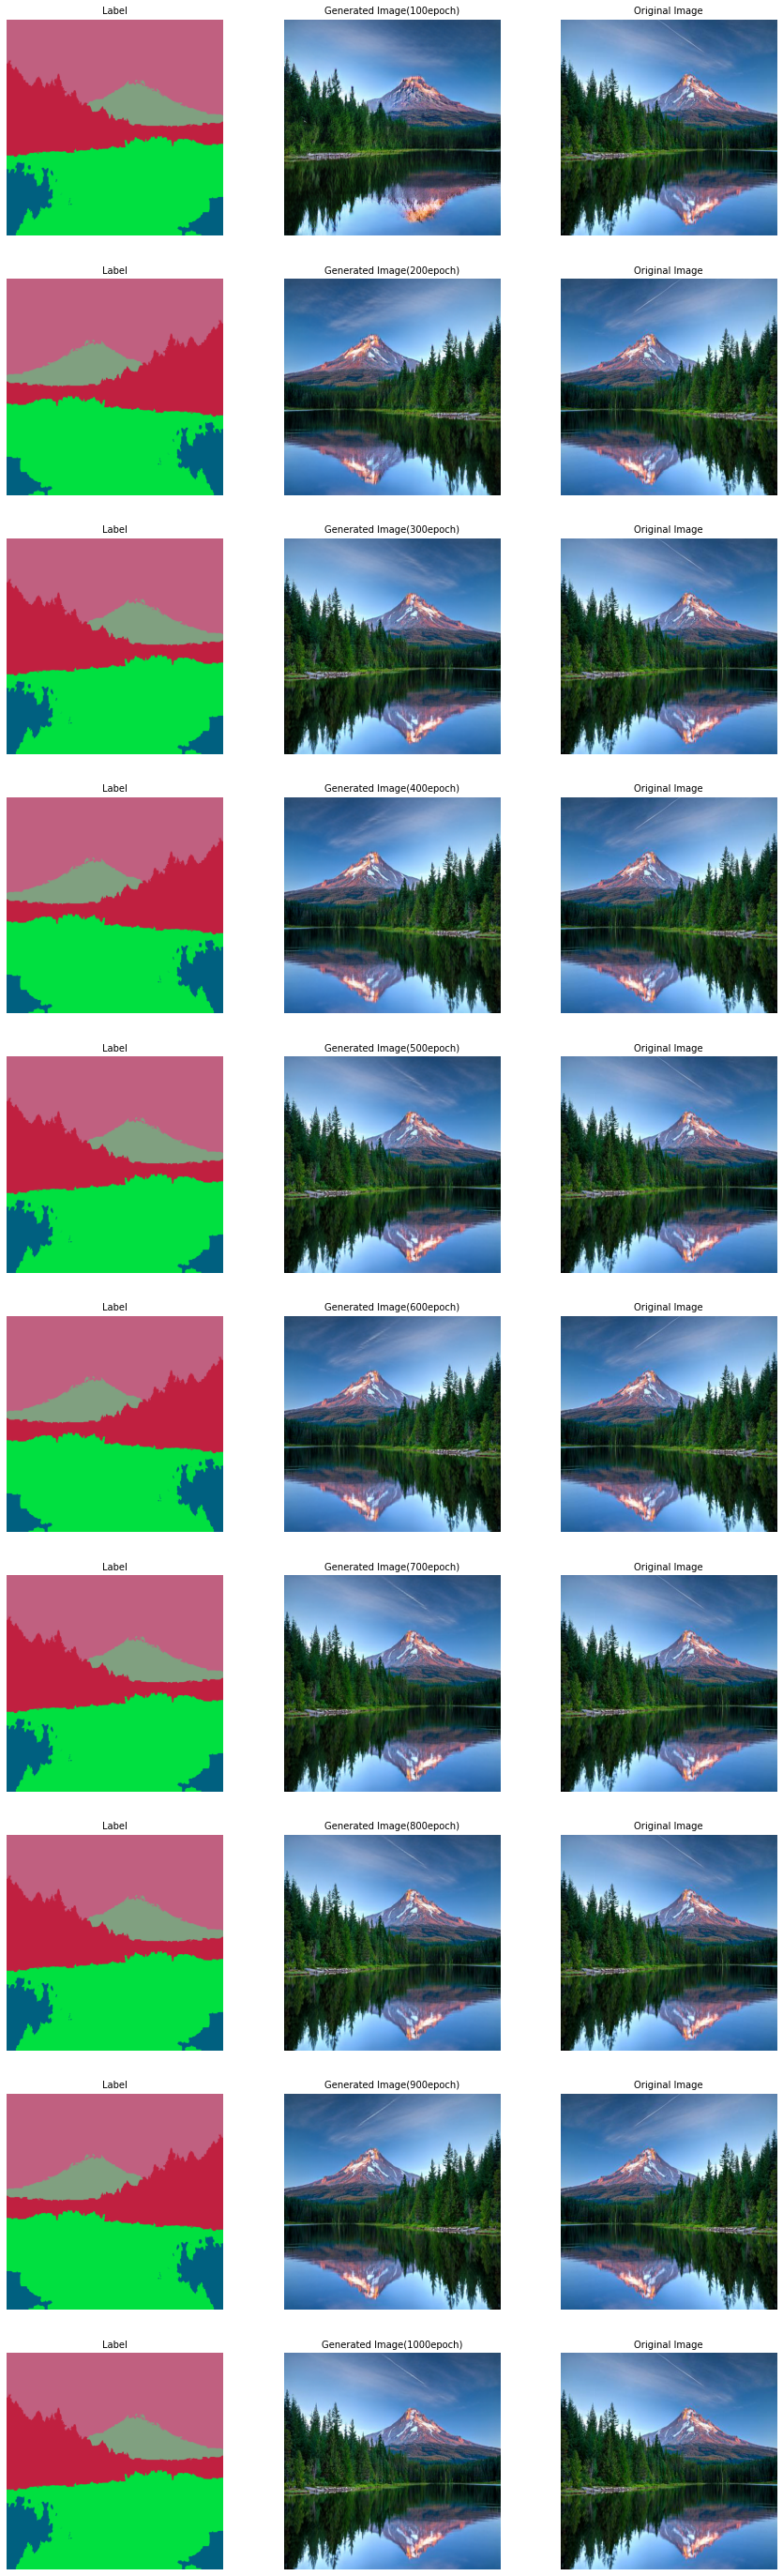

In [24]:
import os
import matplotlib.pyplot as plt

images_link='checkpoints/Flickr/web/images/'

row=len(os.listdir(images_link))//3
plt.figure(figsize=(15, row*5))
for idx in range(row):
    epoch=100*(idx+1)
    lab=plt.imread(os.path.join(images_link, f'epoch{epoch}_iter{epoch}_input_label.png'))
    gen_img=plt.imread(os.path.join(images_link,f'epoch{epoch}_iter{epoch}_synthesized_image.png'))
    ori_img=plt.imread(os.path.join(images_link,f'epoch{epoch}_iter{epoch}_real_image.png'))
    plt.subplot(row,3,3*idx+1)
    plt.imshow(lab)
    plt.title('Label', size=10)
    plt.axis('off')
    plt.subplot(row,3,3*idx+2)
    plt.imshow(gen_img)
    plt.title(f'Generated Image({epoch}epoch)', size=10)
    plt.axis('off')
    plt.subplot(row,3,3*idx+3)
    plt.title('Original Image', size=10)
    plt.imshow(ori_img)
    plt.axis('off')

In [9]:
original_img_path='gm_TTTT/val_img2'
result_label_path='results/Flickr/train_50/images/input_label'
result_img_path='results/Flickr/train_50/images/synthesized_image'


In [15]:
os.listdir(images_link)

['epoch100_iter100_input_label.png',
 'epoch100_iter100_synthesized_image.png',
 'epoch100_iter100_real_image.png',
 'epoch200_iter200_input_label.png',
 'epoch200_iter200_synthesized_image.png',
 'epoch200_iter200_real_image.png',
 'epoch300_iter300_input_label.png',
 'epoch300_iter300_synthesized_image.png',
 'epoch300_iter300_real_image.png',
 'epoch400_iter400_input_label.png',
 'epoch400_iter400_synthesized_image.png',
 'epoch400_iter400_real_image.png',
 'epoch500_iter500_input_label.png',
 'epoch500_iter500_synthesized_image.png',
 'epoch500_iter500_real_image.png',
 'epoch600_iter600_input_label.png',
 'epoch600_iter600_synthesized_image.png',
 'epoch600_iter600_real_image.png',
 'epoch700_iter700_input_label.png',
 'epoch700_iter700_synthesized_image.png',
 'epoch700_iter700_real_image.png',
 'epoch800_iter800_input_label.png',
 'epoch800_iter800_synthesized_image.png',
 'epoch800_iter800_real_image.png',
 'epoch900_iter900_input_label.png',
 'epoch900_iter900_synthesized_imag

In [16]:
original_img_path='gm_TTTT/val_img2'
result_label_path='results/Flickr/train_50/images/input_label'
result_img_path='results/Flickr/train_50/images/synthesized_image'

lab=plt.imread(os.path.join(result_label_path, '003'+'.png'))
gen_img=plt.imread(os.path.join(result_img_path, '003'+'.png'))
ori_img=plt.imread(os.path.join(original_img_path, '003'+'.jpg'))

(-0.5, 740.5, 485.5, -0.5)

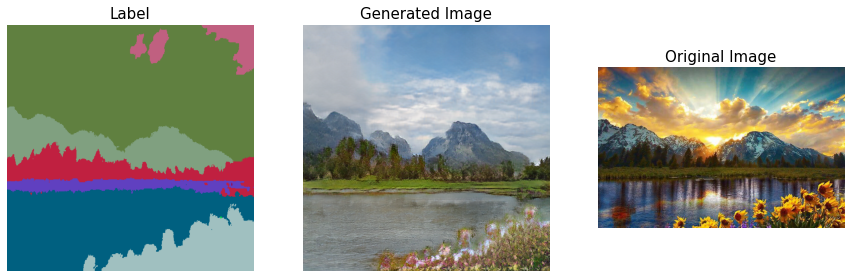

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(lab)
plt.title('Label', size=15)
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(gen_img)
plt.title('Generated Image', size=15)
plt.axis('off')
plt.subplot(1,3,3)
plt.title('Original Image', size=15)
plt.imshow(ori_img)
plt.axis('off')

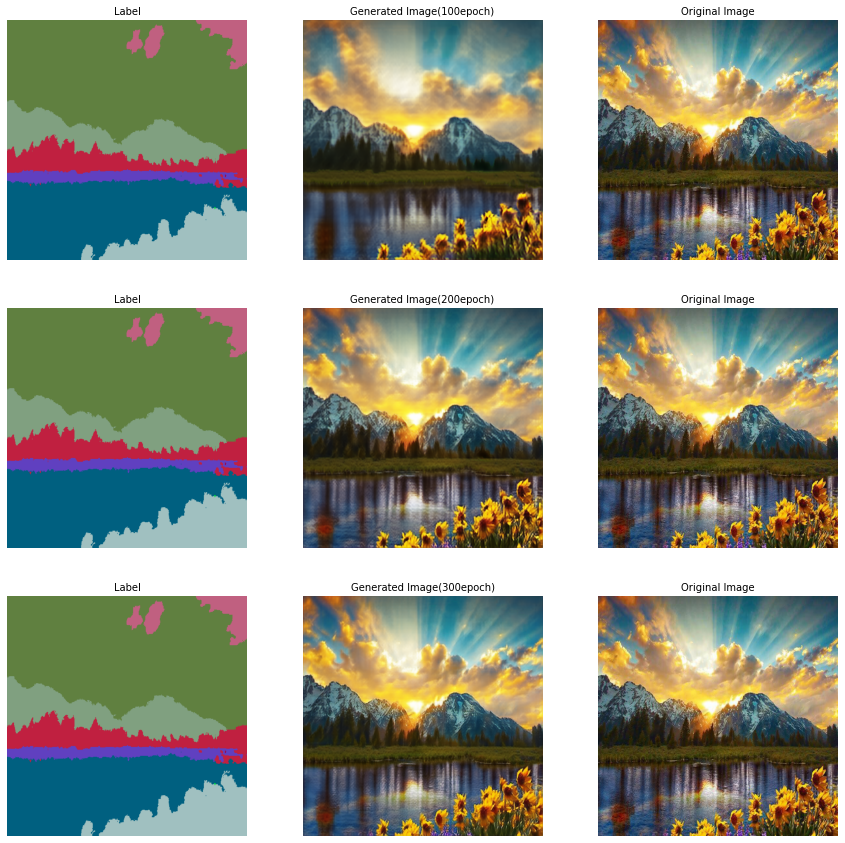

In [14]:
import os
import matplotlib.pyplot as plt

images_link='checkpoints/Flickr/web/images/'

row=len(os.listdir(images_link))//3

row=3
plt.figure(figsize=(15, row*5))
for idx in range(row):
    epoch=100*(idx+1)
    lab=plt.imread(os.path.join(images_link, f'epoch{epoch}_iter{epoch}_input_label.png'))
    gen_img=plt.imread(os.path.join(images_link,f'epoch{epoch}_iter{epoch}_synthesized_image.png'))
    ori_img=plt.imread(os.path.join(images_link,f'epoch{epoch}_iter{epoch}_real_image.png'))
    plt.subplot(row,3,3*idx+1)
    plt.imshow(lab)
    plt.title('Label', size=10)
    plt.axis('off')
    plt.subplot(row,3,3*idx+2)
    plt.imshow(gen_img)
    plt.title(f'Generated Image({epoch}epoch)', size=10)
    plt.axis('off')
    plt.subplot(row,3,3*idx+3)
    plt.title('Original Image', size=10)
    plt.imshow(ori_img)
    plt.axis('off')

> lr=0.0005

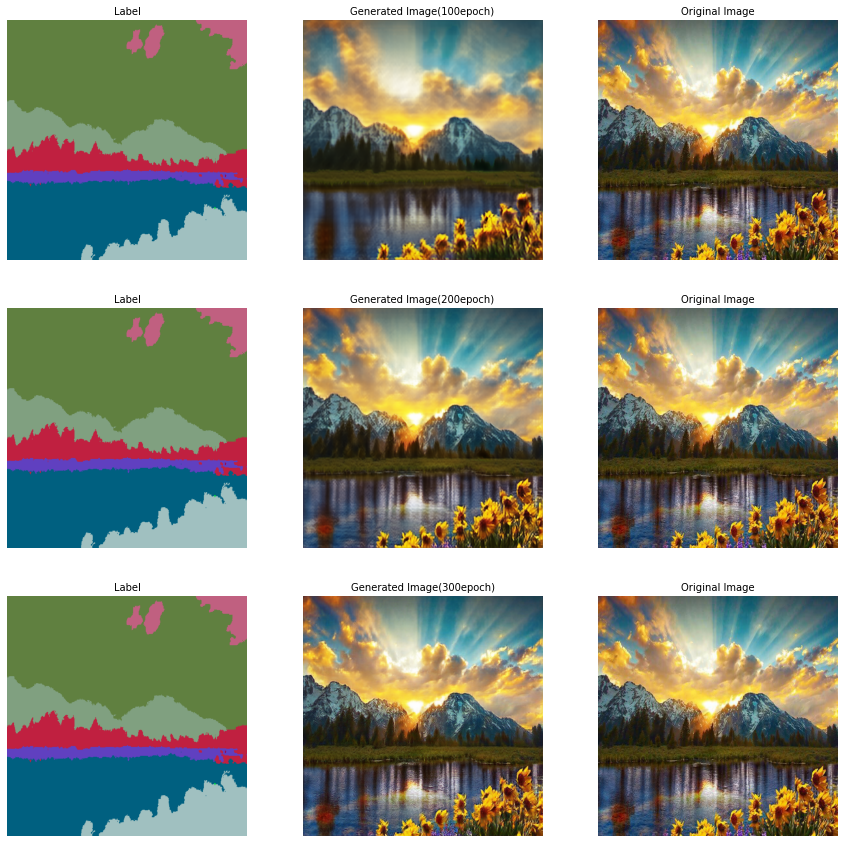

In [18]:
import os
import matplotlib.pyplot as plt

images_link='checkpoints/Flickr/web/images/'

row=len(os.listdir(images_link))//3

row=3
plt.figure(figsize=(15, row*5))
for idx in range(row):
    epoch=100*(idx+1)
    lab=plt.imread(os.path.join(images_link, f'epoch{epoch}_iter{epoch}_input_label.png'))
    gen_img=plt.imread(os.path.join(images_link,f'epoch{epoch}_iter{epoch}_synthesized_image.png'))
    ori_img=plt.imread(os.path.join(images_link,f'epoch{epoch}_iter{epoch}_real_image.png'))
    plt.subplot(row,3,3*idx+1)
    plt.imshow(lab)
    plt.title('Label', size=10)
    plt.axis('off')
    plt.subplot(row,3,3*idx+2)
    plt.imshow(gen_img)
    plt.title(f'Generated Image({epoch}epoch)', size=10)
    plt.axis('off')
    plt.subplot(row,3,3*idx+3)
    plt.title('Original Image', size=10)
    plt.imshow(ori_img)
    plt.axis('off')

## 008.jpg

In [19]:
original_img_path='gm_TTTT/val_img3'
result_label_path='results/Flickr/train_50/images/input_label'
result_img_path='results/Flickr/train_50/images/synthesized_image'


In [21]:
lab=plt.imread(os.path.join(result_label_path, '008'+'.png'))
gen_img=plt.imread(os.path.join(result_img_path, '008'+'.png'))
ori_img=plt.imread(os.path.join(original_img_path, '008_02'+'.jpg'))

(-0.5, 735.5, 596.5, -0.5)

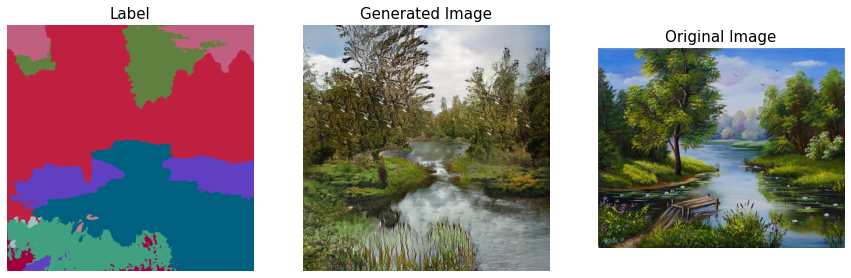

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(lab)
plt.title('Label', size=15)
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(gen_img)
plt.title('Generated Image', size=15)
plt.axis('off')
plt.subplot(1,3,3)
plt.title('Original Image', size=15)
plt.imshow(ori_img)
plt.axis('off')

In [25]:
os.listdir(images_link)

['epoch100_iter100_input_label.png',
 'epoch100_iter100_synthesized_image.png',
 'epoch100_iter100_real_image.png',
 'epoch200_iter200_input_label.png',
 'epoch200_iter200_synthesized_image.png',
 'epoch200_iter200_real_image.png',
 'epoch300_iter300_input_label.png',
 'epoch300_iter300_synthesized_image.png',
 'epoch300_iter300_real_image.png',
 'epoch400_iter400_input_label.png',
 'epoch400_iter400_synthesized_image.png',
 'epoch400_iter400_real_image.png',
 'epoch500_iter500_input_label.png',
 'epoch500_iter500_synthesized_image.png',
 'epoch500_iter500_real_image.png',
 'epoch600_iter600_input_label.png',
 'epoch600_iter600_synthesized_image.png',
 'epoch600_iter600_real_image.png',
 'epoch700_iter700_input_label.png',
 'epoch700_iter700_synthesized_image.png',
 'epoch700_iter700_real_image.png',
 'epoch800_iter800_input_label.png',
 'epoch800_iter800_synthesized_image.png',
 'epoch800_iter800_real_image.png',
 'epoch900_iter900_input_label.png',
 'epoch900_iter900_synthesized_imag

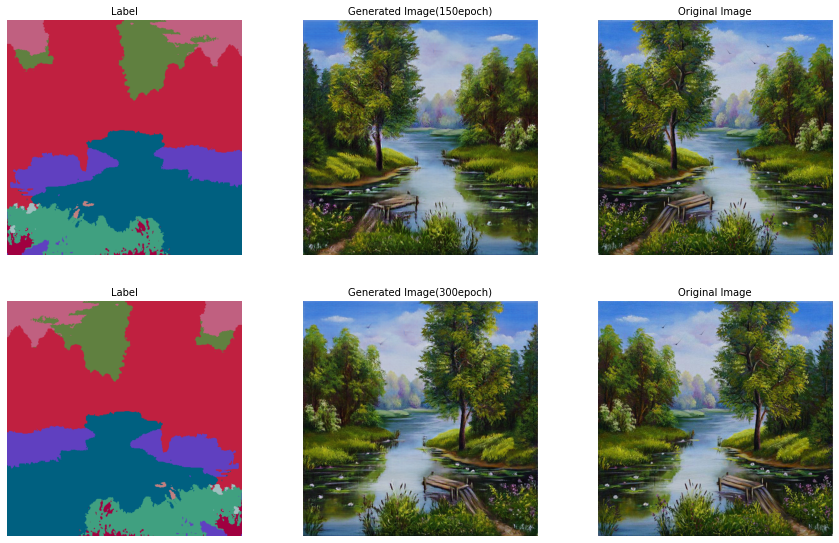

In [30]:
import os
import matplotlib.pyplot as plt

images_link='checkpoints/Flickr/web/images/'

row=len(os.listdir(images_link))//3

row=5
plt.figure(figsize=(15, row*5))
for idx in range(row):
    epoch=100*(idx+1)
    
    if idx==0:
        continue
    if idx==1:
        epoch=150
        
    if idx==3:
        break
    lab=plt.imread(os.path.join(images_link, f'epoch{epoch}_iter{epoch}_input_label.png'))
    gen_img=plt.imread(os.path.join(images_link,f'epoch{epoch}_iter{epoch}_synthesized_image.png'))
    ori_img=plt.imread(os.path.join(images_link,f'epoch{epoch}_iter{epoch}_real_image.png'))
    plt.subplot(row,3,3*idx+1)
    plt.imshow(lab)
    plt.title('Label', size=10)
    plt.axis('off')
    plt.subplot(row,3,3*idx+2)
    plt.imshow(gen_img)
    plt.title(f'Generated Image({epoch}epoch)', size=10)
    plt.axis('off')
    plt.subplot(row,3,3*idx+3)
    plt.title('Original Image', size=10)
    plt.imshow(ori_img)
    plt.axis('off')

# 5. 기타 코드

### Label_nc에 맞게 Label map 수정

In [153]:
ori_label_map=plt.imread('TTTT/train_label/000000001993.png')

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(lab)
plt.title('Label', size=15)
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(gen_img)
plt.title('Generated Image', size=15)
plt.axis('off')
plt.subplot(1,3,3)
plt.title('Original Image', size=15)
plt.imshow(ori_img)
plt.axis('off')

In [237]:
print('label_nc = ',len(np.unique(ori_label_map))) # 1은 제외

label_nc =  12


In [303]:
!pip install celluloid

Defaulting to user installation because normal site-packages is not writeable


In [155]:
ori_label=np.unique(ori_label_map)

In [156]:
ori_label

array([0.23921569, 0.2509804 , 0.25882354, 0.39215687, 0.43529412,
       0.44313726, 0.5137255 , 0.67058825, 0.6745098 , 0.68235296,
       0.7019608 , 1.        ], dtype=float32)

In [157]:
for idx,lab in enumerate(ori_label[:-1]):
    print((idx+1)/255)
    ori_label_map[ori_label_map==lab]=(idx+1)/255

0.00392156862745098
0.00784313725490196
0.011764705882352941
0.01568627450980392
0.0196078431372549
0.023529411764705882
0.027450980392156862
0.03137254901960784
0.03529411764705882
0.0392156862745098
0.043137254901960784


In [223]:
from PIL import Image

In [236]:
np.unique(ori_label_map)

array([0.00392157, 0.00784314, 0.01176471, 0.01568628, 0.01960784,
       0.02352941, 0.02745098, 0.03137255, 0.03529412, 0.03921569,
       0.04313726, 1.        ], dtype=float32)

In [228]:
img=Image.fromarray((255*ori_label_map).astype(np.uint8))

In [234]:
img.save('TTTT/train_label/000000001993.png')

> plt.imsave : pixel 값 변해버린다.

## 오류확인

In [238]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [267]:
input_label=torch.load('TTTT/input_label.pt')
label_map=torch.load('TTTT/label_map.pt')

In [268]:
np.unique(input_label)

array([0.], dtype=float32)

In [269]:
input_label.shape

torch.Size([1, 12, 256, 256])

In [270]:

label_map.size()

torch.Size([1, 1, 256, 256])

In [271]:
np.unique(label_map)

array([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12])

In [272]:
label_map[label_map==12]=11

In [273]:
np.unique(label_map)

array([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11])

In [276]:
print(input_label.shape)
np.unique(input_label)

torch.Size([1, 12, 256, 256])


array([0.], dtype=float32)

In [281]:
semantics=input_label.scatter_(1,label_map,1.0)

In [283]:
print(semantics.shape)
print(np.unique(semantics))

torch.Size([1, 12, 256, 256])
[0. 1.]


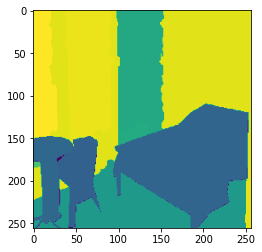

In [24]:
# plt.imshow(np.array(input_label))
plt.imshow(np.array(label_map.squeeze(0).squeeze(0)))

In [101]:
np.unique(label_map)

array([  8,  61,  64,  66, 100, 111, 113, 131, 171, 172, 174, 179])

In [255]:
np.unique(plt.imread( 'TTTT/train_label/000000001993.png'))

array([0.00392157, 0.00784314, 0.01176471, 0.01568628, 0.01960784,
       0.02352941, 0.02745098, 0.03137255, 0.03529412, 0.03921569,
       0.04313726, 1.        ], dtype=float32)

In [30]:
input_label.scatter_(1,label_map,1.0)

TypeError: scatter_() received an invalid combination of arguments - got (str), but expected one of:
 * (int dim, Tensor index, Tensor src)
 * (int dim, Tensor index, Tensor src, *, str reduce)
 * (int dim, Tensor index, Number value)
 * (int dim, Tensor index, Number value, *, str reduce)


## 오류확인 2

In [8]:
image_dir='TTTT/val_img/000000203744.jpg'
label_dir='TTTT/val_label/000000203744.png'

In [23]:
np.unique(plt.imread(label_dir)*255)

array([ 15., 119., 154., 255.], dtype=float32)

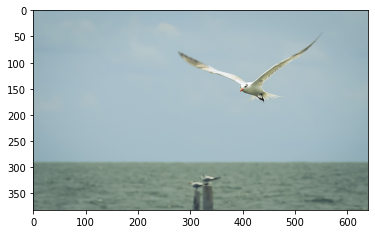

In [9]:
plt.imshow(plt.imread(image_dir))

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [14]:
input_label=torch.load('TTTT/input_label.pt')
label_map=torch.load('TTTT/label_map.pt')

In [15]:
input_label.shape


torch.Size([1, 182, 305, 512])

In [16]:
label_map.size()

torch.Size([1, 1, 305, 512])

In [17]:
np.unique(label_map)

array([ 15, 119, 154, 182])

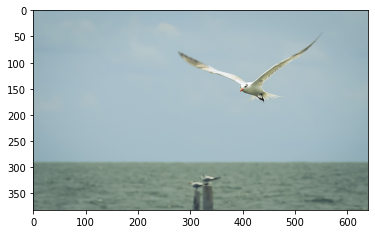

In [18]:
plt.imshow(plt.imread(image_dir))

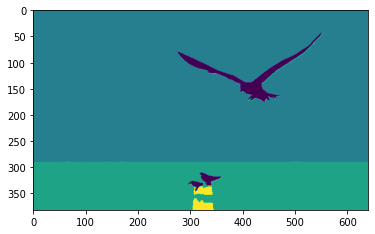

In [19]:
plt.imshow(plt.imread(label_dir))

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'street sign', 12: 'stop sign', 13: 'parking meter', 14: 'bench', 15: 'bird', 16: 'cat', 17: 'dog', 18: 'horse', 19: 'sheep', 20: 'cow', 21: 'elephant', 22: 'bear', 23: 'zebra', 24: 'giraffe', 25: 'hat', 26: 'backpack', 27: 'umbrella', 28: 'shoe', 29: 'eye glasses', 30: 'handbag', 31: 'tie', 32: 'suitcase', 33: 'frisbee', 34: 'skis', 35: 'snowboard', 36: 'sports ball', 37: 'kite', 38: 'baseball bat', 39: 'baseball glove', 40: 'skateboard', 41: 'surfboard', 42: 'tennis racket', 43: 'bottle', 44: 'plate', 45: 'wine glass', 46: 'cup', 47: 'fork', 48: 'knife', 49: 'spoon', 50: 'bowl', 51: 'banana', 52: 'apple', 53: 'sandwich', 54: 'orange', 55: 'broccoli', 56: 'carrot', 57: 'hot dog', 58: 'pizza', 59: 'donut', 60: 'cake', 61: 'chair', 62: 'couch', 63: 'potted plant', 64: 'bed', 65: 'mirror', 66: 'dining table', 67: 'window', 68: 'desk', 69: 'toilet', 70: 'door', 71: 'tv', 72: 'laptop', 73: 'mouse', 74: 'remote', 75: 'keyboard', 76: 'cell phone', 77: 'microwave', 78: 'oven', 79: 'toaster', 80: 'sink', 81: 'refrigerator', 82: 'blender', 83: 'book', 84: 'clock', 85: 'vase', 86: 'scissors', 87: 'teddy bear', 88: 'hair drier', 89: 'toothbrush', 90: 'hair brush', 91: 'banner', 92: 'blanket', 93: 'branch', 94: 'bridge', 95: 'building-other', 96: 'bush', 97: 'cabinet', 98: 'cage', 99: 'cardboard', 100: 'carpet', 101: 'ceiling-other', 102: 'ceiling-tile', 103: 'cloth', 104: 'clothes', 105: 'clouds', 106: 'counter', 107: 'cupboard', 108: 'curtain', 109: 'desk-stuff', 110: 'dirt', 111: 'door-stuff', 112: 'fence', 113: 'floor-marble', 114: 'floor-other', 115: 'floor-stone', 116: 'floor-tile', 117: 'floor-wood', 118: 'flower', 119: 'fog', 120: 'food-other', 121: 'fruit', 122: 'furniture-other', 123: 'grass', 124: 'gravel', 125: 'ground-other', 126: 'hill', 127: 'house', 128: 'leaves', 129: 'light', 130: 'mat', 131: 'metal', 132: 'mirror-stuff', 133: 'moss', 134: 'mountain', 135: 'mud', 136: 'napkin', 137: 'net', 138: 'paper', 139: 'pavement', 140: 'pillow', 141: 'plant-other', 142: 'plastic', 143: 'platform', 144: 'playingfield', 145: 'railing', 146: 'railroad', 147: 'river', 148: 'road', 149: 'rock', 150: 'roof', 151: 'rug', 152: 'salad', 153: 'sand', 154: 'sea', 155: 'shelf', 156: 'sky-other', 157: 'skyscraper', 158: 'snow', 159: 'solid-other', 160: 'stairs', 161: 'stone', 162: 'straw', 163: 'structural-other', 164: 'table', 165: 'tent', 166: 'textile-other', 167: 'towel', 168: 'tree', 169: 'vegetable', 170: 'wall-brick', 171: 'wall-concrete', 172: 'wall-other', 173: 'wall-panel', 174: 'wall-stone', 175: 'wall-tile', 176: 'wall-wood', 177: 'water-other', 178: 'waterdrops', 179: 'window-blind', 180: 'window-other', 181: 'wood'}

In [31]:
label=plt.imread(label_dir)

In [38]:
label[10, 10]

0.46666667

In [39]:
label[10,10]*255

119.00000050663948

In [40]:
label[300,100]*255

154.00000602006912

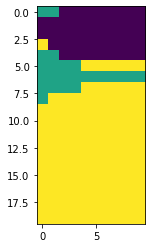

In [46]:
plt.imshow(label[330:350, 330:340])

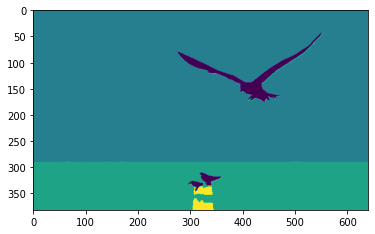

In [34]:
plt.imshow(label)

In [ ]:
label

In [33]:
label[200, 100]

0.46666667

In [13]:
np.unique(label*255)

array([ 15., 119., 154., 255.], dtype=float32)

In [50]:
mask=(label==1)

In [52]:
label[mask]=181 # 라벨수정

In [54]:
from PIL import Image

In [55]:
a=Image.fromarray((label*255).astype(np.uint8))
a.save('TTTT/test_label2/000000203744.png')

In [58]:
image_dir='TTTT/val_img/000000203744.jpg'
label_dir='TTTT/test_label2/000000203744.png'

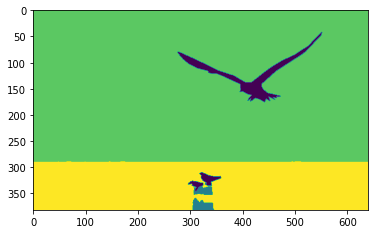

In [59]:
plt.imshow(plt.imread(label_dir))

In [62]:
np.unique(plt.imread(label_dir))

array([0.05882353, 0.29411766, 0.46666667, 0.6039216 ], dtype=float32)

# Input size 저절로 맞춰지지 않음.

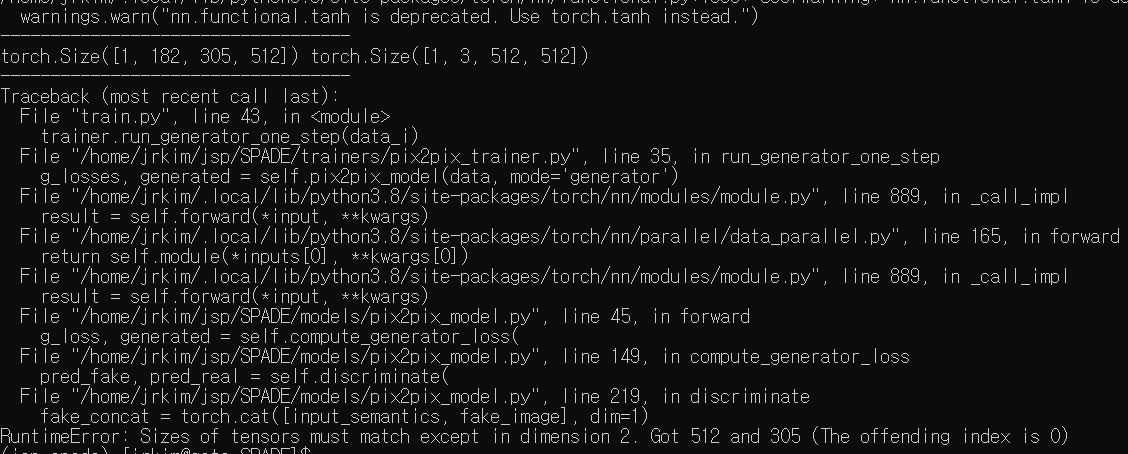

> 차례대로 semantics 마스크 + Generated Image  
즉, Semantic mask는 ㄴㄴ..

> 근데 coco 할 때는 문제 없었는데,,

> crop_size 286으로 했을 때  
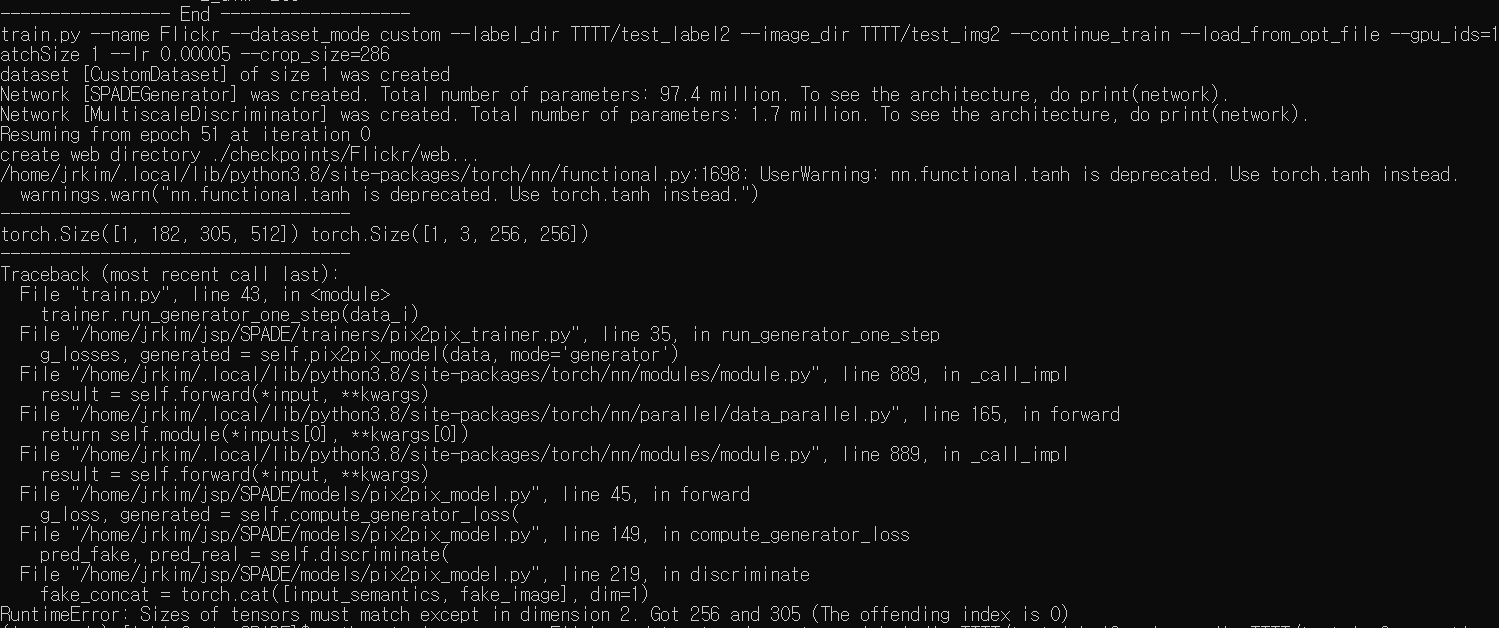

> load_size=256으로 했을 때  
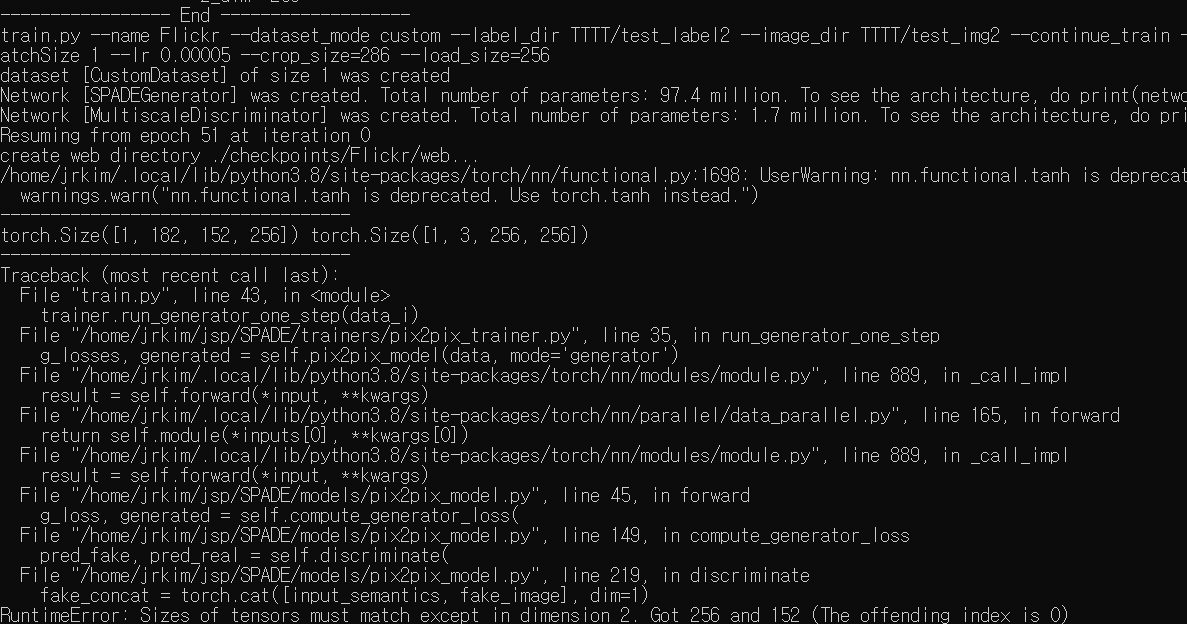

> Custom Dataset이랑 달라진 점  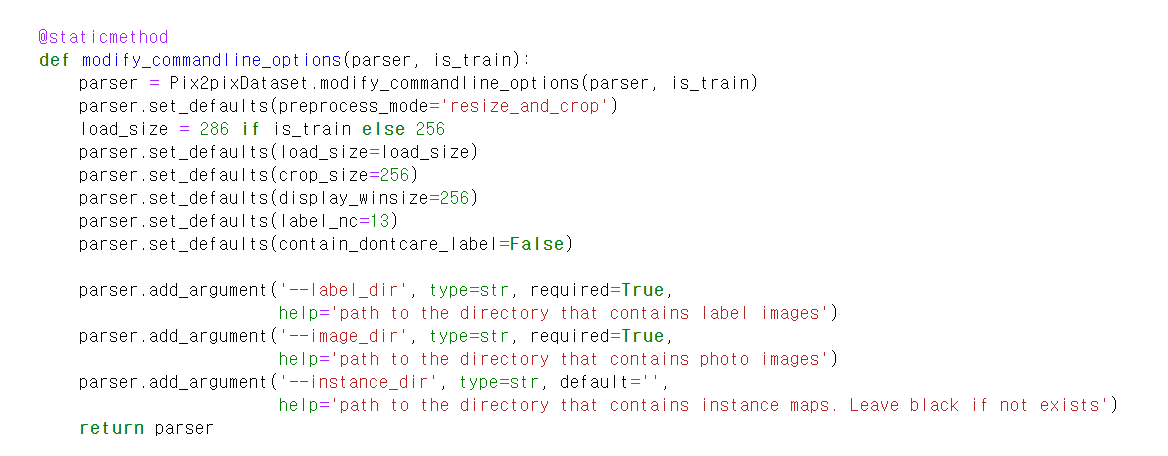

> 학습 잘 됐던 custom에서 label은 419, 640이었음.

**preprocessing_mode**..<-- 얘가 문제

In [80]:
img='TTTT/train_img/000000001993.jpg'
lab='TTTT/train_label/000000001993.png'



In [81]:
img=plt.imread(img)
lab=plt.imread(lab)

In [83]:
lab.shape

(419, 640)